In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score


In [2]:
df=pd.read_csv('mob train.csv')

In [3]:
df

,id,battery_power,bluetooth,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,807,1,0.5,1,0,0,37,0.2,127,...,245,829,2319,5,4,4,0,0,0,1
1,2,1065,1,0.5,0,0,1,14,0.7,89,...,188,928,3078,10,1,18,1,0,1,2
2,3,1171,1,1.7,1,2,0,19,0.3,167,...,248,755,263,6,5,8,0,0,0,0
3,4,609,1,3.0,0,15,1,44,0.3,117,...,58,1253,2581,15,11,15,1,0,1,1
4,5,1193,1,2.3,0,7,0,20,1.0,158,...,1442,1904,1958,7,5,2,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,1396,1100,1,1.6,0,12,0,15,0.1,112,...,919,1344,757,12,2,16,1,1,1,0
1396,1397,1358,0,2.5,1,0,0,20,0.6,135,...,1485,1655,3406,5,1,11,0,0,1,3
1397,1398,1034,1,2.7,1,6,0,37,0.7,120,...,707,1199,3625,17,1,12,0,1,1,3
1398,1399,703,1,2.7,0,12,1,30,0.3,113,...,218,1065,1472,14,7,7,1,0,0,0


In [4]:
df.shape

(1400, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1400 non-null   int64  
 1   battery_power  1400 non-null   int64  
 2   bluetooth      1400 non-null   int64  
 3   clock_speed    1400 non-null   float64
 4   dual_sim       1400 non-null   int64  
 5   fc             1400 non-null   int64  
 6   four_g         1400 non-null   int64  
 7   int_memory     1400 non-null   int64  
 8   m_dep          1400 non-null   float64
 9   mobile_wt      1400 non-null   int64  
 10  n_cores        1400 non-null   int64  
 11  pc             1400 non-null   int64  
 12  px_height      1400 non-null   int64  
 13  px_width       1400 non-null   int64  
 14  ram            1400 non-null   int64  
 15  sc_h           1400 non-null   int64  
 16  sc_w           1400 non-null   int64  
 17  talk_time      1400 non-null   int64  
 18  three_g 

In [6]:
df['battery_power'].value_counts()

1872    5
1413    5
772     5
504     5
1414    4
       ..
1522    1
691     1
722     1
1530    1
1064    1
Name: battery_power, Length: 919, dtype: int64

In [7]:
df['ram'].value_counts()

1214    3
2973    3
2107    3
2944    3
2819    3
       ..
1803    1
3024    1
262     1
794     1
654     1
Name: ram, Length: 1166, dtype: int64

In [8]:
df['talk_time'].value_counts()

4     93
7     89
16    85
15    84
2     78
19    74
18    74
11    74
20    73
6     72
17    71
3     71
12    71
14    68
13    66
9     66
8     65
10    64
5     62
Name: talk_time, dtype: int64

In [9]:
df['int_memory'].value_counts()

42    32
27    32
10    29
5     29
8     28
      ..
48    15
4     14
25    14
59    12
62    12
Name: int_memory, Length: 63, dtype: int64

In [10]:
df['price_range'].value_counts()

1    350
2    350
0    350
3    350
Name: price_range, dtype: int64

In [11]:
df.describe()

,id,battery_power,bluetooth,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1400.0000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,...,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,700.5000,1237.027143,0.499286,1.526071,0.505714,4.215000,0.515714,32.147143,0.505143,140.125714,...,652.376429,1244.966429,2122.869286,12.294286,5.787143,10.972143,0.756429,0.503571,0.512143,1.500000
std,404.2895,440.555073,0.500178,0.824300,0.500146,4.251417,0.499932,18.209559,0.290107,35.361221,...,447.273563,428.168423,1087.155644,4.160191,4.376048,5.546213,0.429390,0.500166,0.500031,1.118434
min,1.0000,502.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,350.7500,842.000000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,...,283.750000,874.000000,1205.750000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,700.5000,1222.500000,0.000000,1.500000,1.000000,3.000000,1.000000,31.000000,0.500000,141.000000,...,576.000000,1247.000000,2127.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1050.2500,1615.000000,1.000000,2.300000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,...,958.500000,1613.000000,3049.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1400.0000,1998.000000,1.000000,3.000000,1.000000,18.000000,1.000000,64.000000,1.000000,200.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


<Figure size 432x288 with 0 Axes>

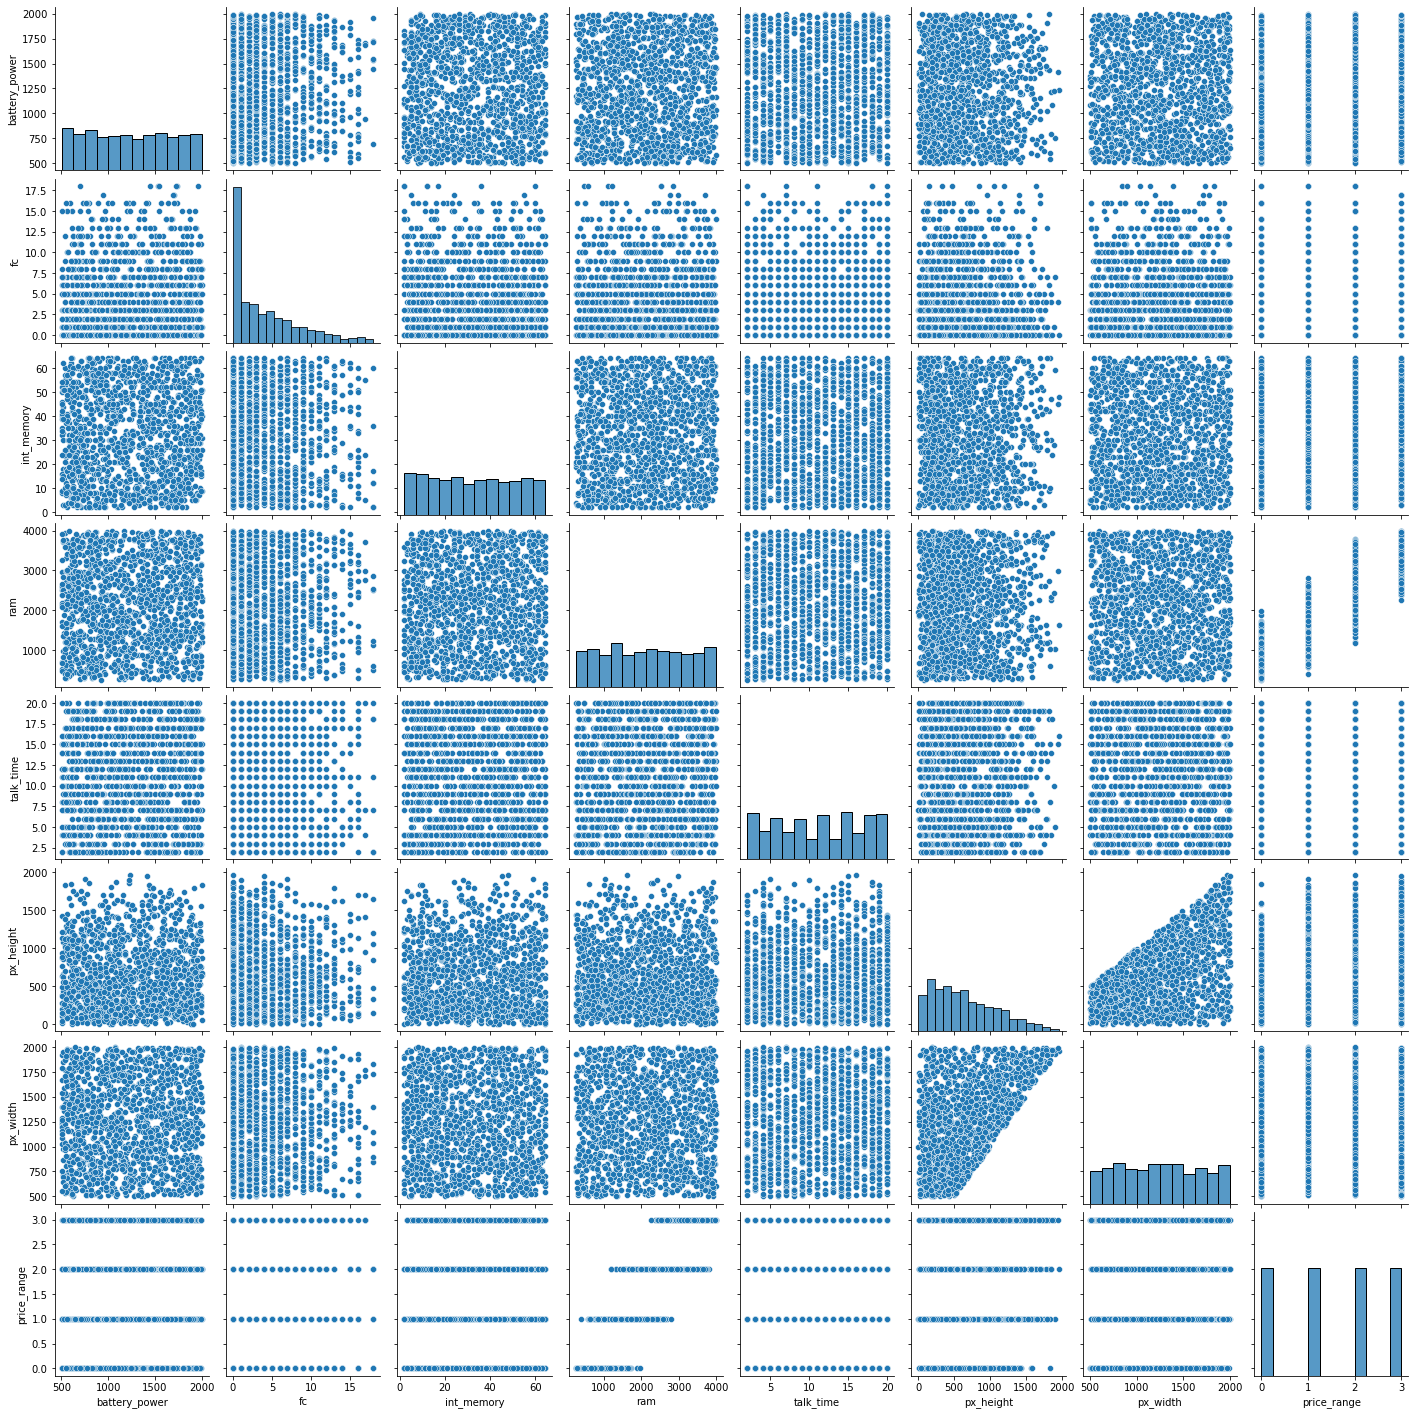

In [12]:
#Pair Plot
plt.figure()
sn.pairplot(df, vars=['battery_power','fc','int_memory','ram','talk_time','px_height','px_width','price_range'])
plt.show()

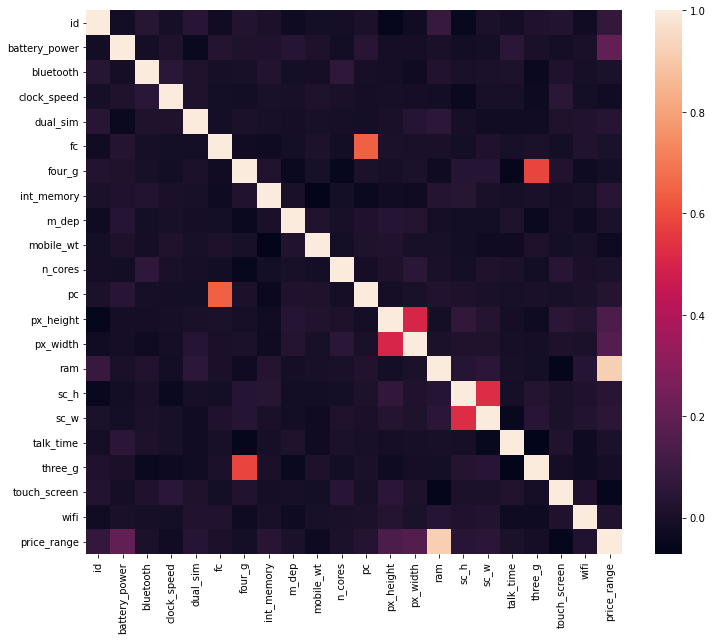

In [13]:
#Heatmap
plt.figure(figsize=(12,10))
sn.heatmap(df.corr())
plt.show()

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

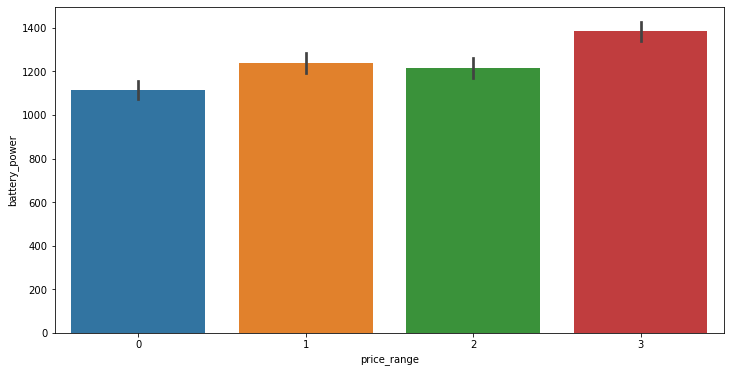

In [14]:
#Price_range and Battery_power
plt.figure(figsize=(12,6))
sn.barplot(x='price_range',y='battery_power',data=df)

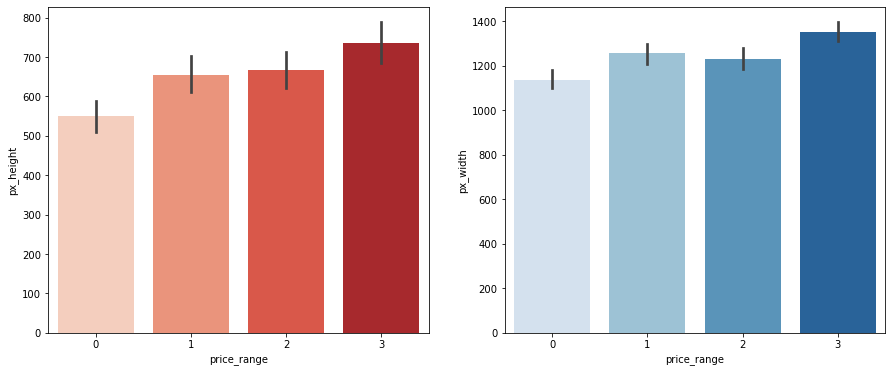

In [15]:
#Price_range and pixel h/w
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sn.barplot(x='price_range',y='px_height', data=df, palette='Reds')
plt.subplot(1,2,2)
sn.barplot(x='price_range',y='px_width', data=df, palette='Blues')
plt.show()

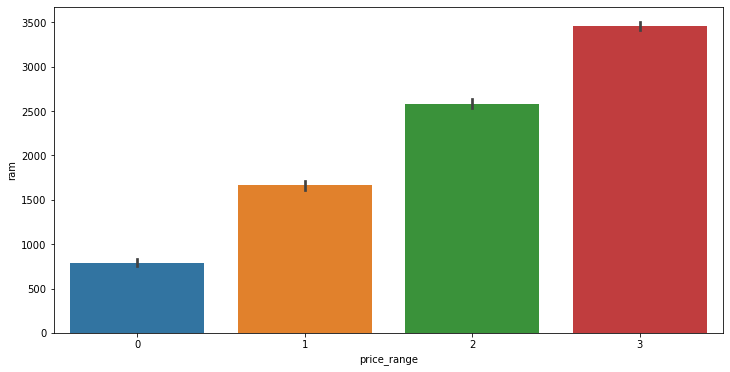

In [16]:
#Price_range and ram
plt.figure(figsize=(12,6))
sn.barplot(x='price_range', y= 'ram',data=df)
plt.show()

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


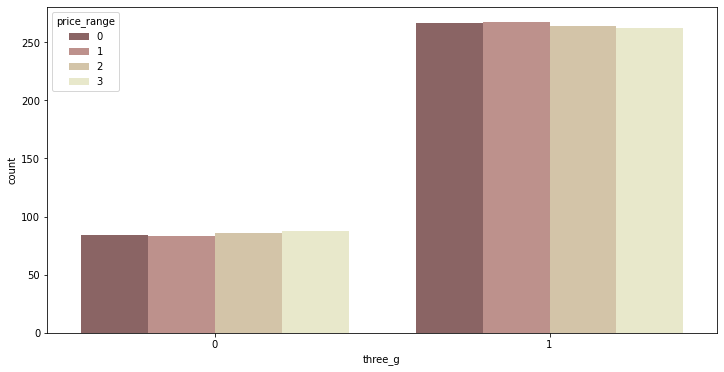

In [17]:
#Price_range and 3g 4g
plt.figure(figsize=(12,6))
sn.countplot(df['three_g'], hue=df['price_range'], palette='pink')
plt.show()

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


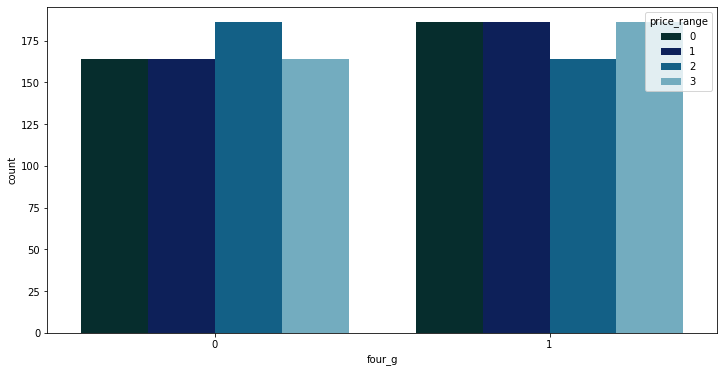

In [18]:
#4G
plt.figure(figsize=(12,6))
sn.countplot(df['four_g'], hue=df['price_range'], palette='ocean')
plt.show()

<AxesSubplot:xlabel='price_range', ylabel='int_memory'>

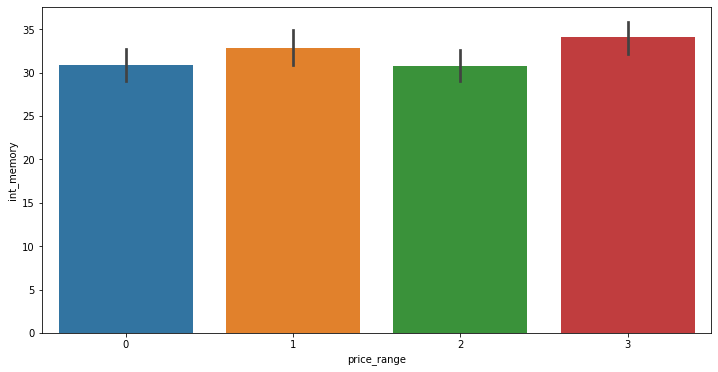

In [19]:
#price & internal memory
plt.figure(figsize=(12,6))
sn.barplot(x="price_range", y="int_memory", data=df)

<AxesSubplot:>

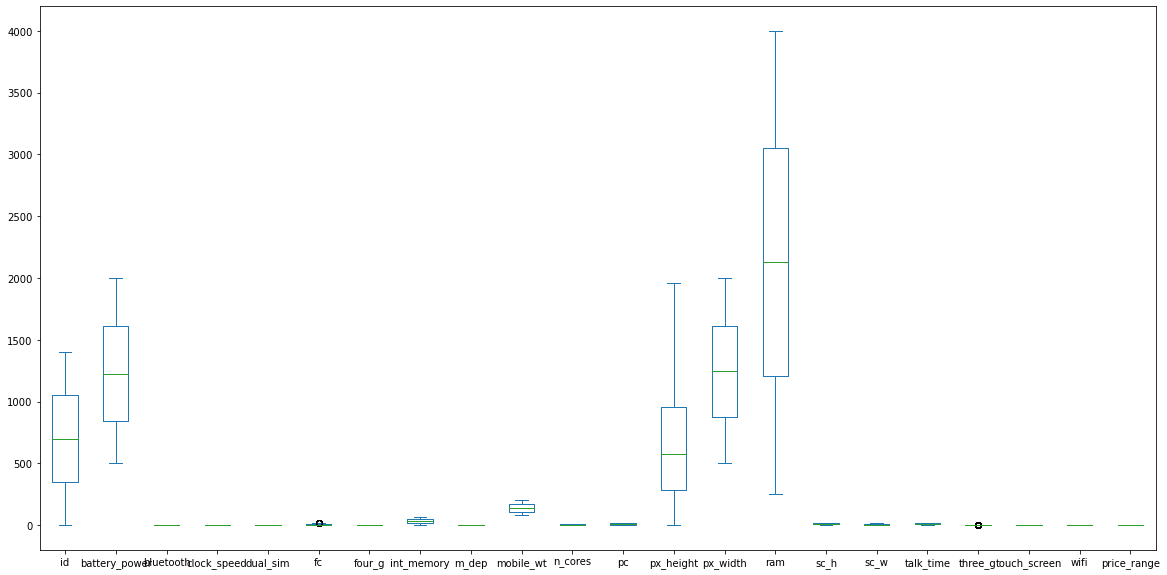

In [20]:
#Box Plot
df.plot(kind='box',figsize=(20,10))

In [21]:
x=df.drop('price_range',axis=1)

In [22]:
y=df['price_range']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=101)

In [24]:
# K-Nearest Neighbor

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=10)

In [26]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [27]:
print("KNN model accuracy Score: ",knn.score(x_test,y_test))

KNN model accuracy Score:  0.8809523809523809


In [28]:
y_pred=knn.predict(x_test)

In [29]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[116,   7,   0,   0],
       [  7,  97,   7,   0],
       [  0,  10,  98,   6],
       [  0,   0,  18,  96]], dtype=int64)

Text(33.0, 0.5, '')

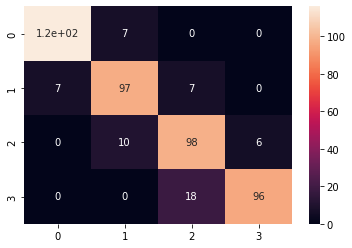

In [30]:
sn.heatmap(cm, annot=True)
plt.xlabel('')
plt.ylabel('')

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       123
           1       0.85      0.87      0.86       111
           2       0.80      0.86      0.83       114
           3       0.94      0.84      0.89       114

    accuracy                           0.88       462
   macro avg       0.88      0.88      0.88       462
weighted avg       0.88      0.88      0.88       462



In [32]:
# Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [35]:
y_Pred = gnb.predict(x_test)

In [36]:
from sklearn import metrics
print("Naive Bayes model accuracy :", metrics.accuracy_score(y_test, y_pred))

Naive Bayes model accuracy : 0.8809523809523809


In [37]:
#Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rfc=RandomForestClassifier(n_estimators=200)

In [40]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [41]:
rfc.score(x_test,y_test)

0.8571428571428571

In [42]:
print("Random Forest Classifier accuracy :",rfc.score(x_test,y_test))

Random Forest Classifier accuracy : 0.8571428571428571


In [43]:
#SVM(Support Vector Machine)

In [44]:
from sklearn.svm import SVC

In [45]:
model1 = SVC()

In [46]:
model1.fit(x_train, y_train)

SVC()

In [47]:
model1.score(x_test, y_test)

0.9415584415584416

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
pred=model1.predict(x_test)

In [50]:
# Regularization
model_C = SVC(C=10)
model_C.fit(x_train, y_train)
model_C.score(x_test, y_test)

0.948051948051948

In [51]:
# Gamma
model_g = SVC(gamma=10)
model_g.fit(x_train, y_train)
model_g.score(x_test, y_test)

0.24025974025974026

In [52]:
# Kernel
model_linear_kernl = SVC(kernel='linear')
model_linear_kernl.fit(x_train, y_train)

SVC(kernel='linear')

In [53]:
model_linear_kernl.score(x_test, y_test)

0.9632034632034632

In [54]:
model=model_linear_kernl.predict(x_test)

In [55]:
print('Support Vector Machine Score :', model1.score(x_test, y_test))

Support Vector Machine Score : 0.9415584415584416


In [56]:
## Decision Tree Model

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
dt=DecisionTreeClassifier()

In [59]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [60]:
dt.score(x_test,y_test)

0.7965367965367965

In [61]:
feature_names=['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi',"price_range"]

In [62]:
!pip install pydotplus as pydot
import pydotplus as pydot
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
dot_data = StringIO()

export_graphviz(dt, out_file=dot_data,feature_names=feature_names)

graph = pydot.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


InvocationException: GraphViz's executables not found

In [ ]:
#Prediction 

In [ ]:
#Test Dataset
dataset=pd.read_csv('mob test.csv')

In [ ]:
dataset.head()

In [ ]:
dataset=dataset.drop('id',axis=1)

In [ ]:
dataset.head()

In [ ]:
dataset.insert("price_range",1)
dataset

In [ ]:
#SVM Score
predicted_price= model1.predict(dataset)

In [ ]:
predicted_price

In [ ]:
dataset['price_range']=predicted_price

In [ ]:
#With Price range
dataset